# Zuber - empresa de taxis

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

## Acciones a seguir:

- Cargar las bibliotecas necesarias para el análisis.
- Cargar los archivos /datasets/project_sql_result_01.csv y /datasets/project_sql_result_04.csv
- Explorar los datos que contienen los datasets, corroborando que los tipos de datos y formato para las columnas son correctos.
- Identificar los 10 principales barrios en términos de finalización del recorrido.
- Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.
- Sacar conclusiones basadas en cada gráfico y explicar los resultados
- Realizar una prueba de hipótesis para analizar la hipótesis "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [1]:
### Cargar las bibliotecas necesarias 
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
### Cargar datos
companies = pd.read_csv('/datasets/project_sql_result_01.csv')
locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
### Explorar los datos
companies.info()
print('\n')
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Se observa que el dataframe con los datos de compañías cuenta con 64 filas no contiene datos ausentes y tiene los tipos adecuados de datos tanto en la columna company_name como en la columna trips_amount. De igual manera, el dataframe con las locaciones, no presenta valores ausentes y tiene los tipos de datos correctos para sus dos columnas.

In [5]:
### Identificar los 10 principales barrios en términos de finalización del recorrido
df_top10_locations = locations.sort_values(by='average_trips', ascending=False)
df_top10_locations = df_top10_locations.head(10)
print(df_top10_locations)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


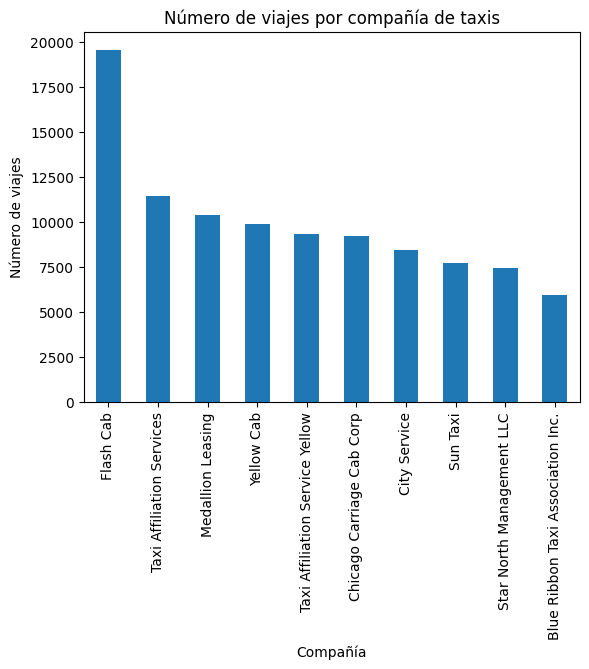

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


In [6]:
### Graficar empresas de taxis y número de viajes
df_top10_companies = companies.sort_values(by='trips_amount', ascending=False)
df_top10_companies = df_top10_companies.head(10)
df_top10_companies.plot(x = 'company_name',
               y = 'trips_amount',
               kind = 'bar',
               title = 'Número de viajes por compañía de taxis',
               xlabel = 'Compañía',
               ylabel = 'Número de viajes',
               legend = False)
plt.show()
print(df_top10_companies)

Se puede observar que las principales empresas de taxis en términos de número de viajes realizaron entre 5953 y 19558 viajes entre el 15 y 16 de noviembre. La empresa que realizó más viajes es Flash Cab que realizó más del triple de viajes que la empresa Blue Ribbon Taxi Association Inc.

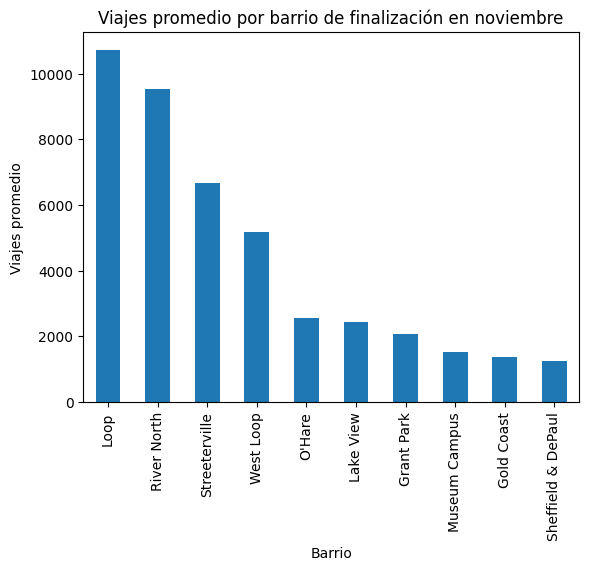

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [7]:
### Graficar los 10 barrios principales por número de finalizaciones
df_top10_locations.plot(x = 'dropoff_location_name',
                        y = 'average_trips',
                        kind = 'bar',
                        title = 'Viajes promedio por barrio de finalización en noviembre',
                        xlabel = 'Barrio',
                        ylabel = 'Viajes promedio',
                        legend = False)
plt.show()
print(df_top10_locations)

Es evidente que el barrio con mayor frecuencia de viajes corresponde a Loop con 10727 viajes superando por 8 veces al barrio en la decima posición que es Sheffield & DePaul. Los viajes promedio de los 10 principales barrios están entre 1259 y 10727 viajes.

In [8]:
### Cargar y analizar datos
df_loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
df_loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


El dataset de viajes desde Loop hasta el aeropuerto O'Hare cuenta con 1068 filas sin datos ausentes. Contiene las columnas de fecha y hora de la recogida (start_ts), condiciones climáticas (weather_conditions) y la duración del viaje (duration_seconds). Todas las columnas tienen el tipo correcto de datos a excepción  de start_ts que debe cambiarse a datetime.

In [9]:
### Convertir start_ts a datetime
df_loop_ohare['start_ts'] = pd.to_datetime(df_loop_ohare['start_ts'])

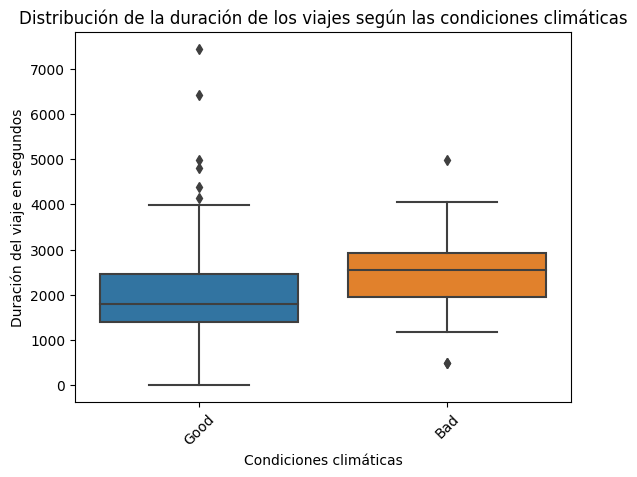

In [10]:
### Graficar boxplot para identificar valores atípicos
sns.boxplot(data=df_loop_ohare, x='weather_conditions', y='duration_seconds')
plt.title('Distribución de la duración de los viajes según las condiciones climáticas')
plt.xlabel('Condiciones climáticas')
plt.ylabel('Duración del viaje en segundos')
plt.xticks(rotation=45)
plt.show()

Es evidente que existen valores atípicos en la duracion de los viajes tanto en días con buen clima como aquellos lluviosos. Se observa que el rango intercuartilico es similar para clima bueno y clima lluvioso, sin embargo, la mediana en los viajes con mal clima es mayor. Por otra parte, los viajes durante un buen clima tienen más valores atípicos.

In [11]:
### Preparación de datos para la prueba de hipótesis
H0 = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos"
H1 = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos"

# Eliminar valores atípicos para evitar sesgar los resultados
Q1 = df_loop_ohare['duration_seconds'].quantile(0.25)
Q3 = df_loop_ohare['duration_seconds'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

# Filtrar valores atípicos
df_loop_ohare = df_loop_ohare[(df_loop_ohare['duration_seconds'] >= lower_limit) & (df_loop_ohare['duration_seconds'] <= upper_limit)]

df_goodweather_durations = df_loop_ohare[df_loop_ohare['weather_conditions']=='Good']['duration_seconds']
df_badweather_durations = df_loop_ohare[df_loop_ohare['weather_conditions']=='Bad']['duration_seconds']

# Prueba de igualdad de varianzas
levene_result= st.levene(df_goodweather_durations, df_badweather_durations)
print('valor p test de levene:',levene_result.pvalue)

alpha=0.05

if levene_result.pvalue < alpha: # comparar el valor p con el umbral
    print("Las varianzas no son iguales")
else:
    print("Las varianzas son iguales")

valor p test de levene: 0.6196707782686355
Las varianzas son iguales


In [12]:
### Prueba de hipótesis
results = st.ttest_ind(df_goodweather_durations, df_badweather_durations, equal_var=True)

if results.pvalue < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')

Se rechaza la hipótesis nula


Despues de realizar la prueba de hipótesis sobre la igualdad de medias poblacionales, se rechaza la hipótesis nula, por lo tanto se determina que la duración promedio de los viajes desde Loop hasta el aeropuerto O'Hare cambia los sabados lluviosos.